<a href="https://colab.research.google.com/github/Andyzxm/GEOG_520_open_source_method/blob/main/A15%2CXinming_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1  State the null hypothesis for the ANOVA test for this specific research question

The null hypothesis for this research question is that there is no difference in means of county level percentage of households without internet per sub-region.

Q2 State the alternative hypothesis for the ANOVA test for this specific research question.

The alternative hypothesis for this research question is that the difference of mean percent households that do not have internet access across different subregions is not equal to zero.

Q3 Why do we need to use an ANOVA test to investigate this research question as opposed to a T-Test?

ANOVA allows us to analyze relationships between 3 or more groups of data and requires fewer number of samples. Therefore We need to use an Anova rather than a T-Test because there are 3 or more groups being compared.

Q4 Explain how the F-Value associated with an ANOVA test is calculated. What defines the numerator and denominator? What defines the degrees of freedom?

F value in the equation is the ANOVA coefficient or F statistic, and it is a ratio of variance and unexplained variance. The numerator of this eqatuion is determined by  Mean Sum of squares due to Error(MSE), and the denominator is determined by Mean Sum of squares due to Treatment(MST). Degrees of freedom are calculated between and within groups that have the sums of squares values.

Q5 list and explain the assumptions of ANOVA. 

Assumption 1: Samples must be independent and there must be no relationships between groups, data from one group cannot be found in another group, and all groups must have the same sample size

Assumption 2: Samples are normally distributed data. 

Assumption 3: There should be equal variance between groups. Homogeneity of variance

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from scipy import stats as st
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 10]

In [ ]:
#Task 1. Read in the data table 
USC=pd.read_csv("/content/drive/MyDrive/GEOG520_python_data/datasets/datasets/us_county_data.csv")

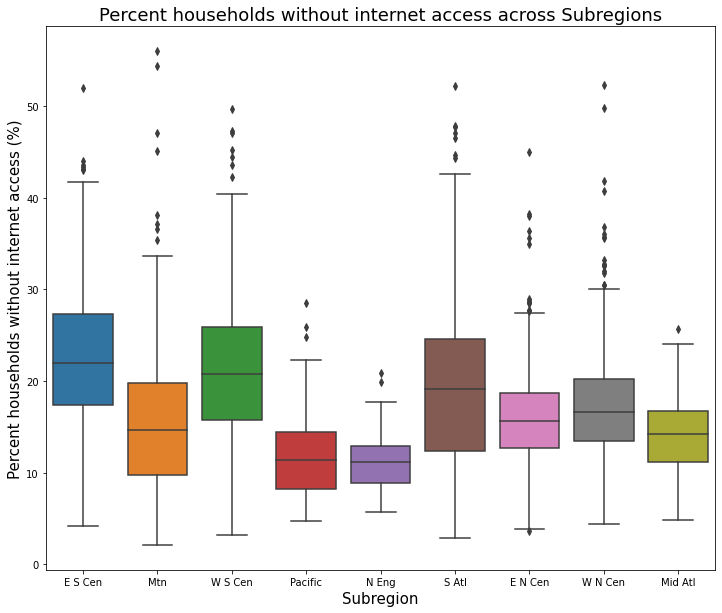

In [ ]:
#Task 2 Create a grouped boxplot that shows the distribution of percent of households without internet access grouped by subregion
box_plot, axs = plt.subplots(1,1)
sns.boxplot(ax = axs, x = "SUB_REGION", y = "per_no_internet", data = USC)
axs.set_title("Percent households without internet access across Subregions", fontsize = 18)
axs.set_xlabel("Subregion", fontsize = 15)
axs.set_ylabel("Percent households without internet access (%)", fontsize = 15)
plt.show(box_plot)


In [ ]:
#Task 3 Perform 50 iterations of an ANOVA test using different random subset of the available counties. Perform 50 replicate tests for each of the following sample sizes: 5, 10, 20, 30, 40, 50.
Anova = pd.DataFrame(columns = ["Rep", "Samp_size", "F-value", "p-value"])

subs = pd.DataFrame(USC[["SUB_REGION", "per_no_internet"]])
ESc = USC.query('SUB_REGION == "E S Cen"')["per_no_internet"]
Mtn = USC.query('SUB_REGION == "Mtn"')["per_no_internet"]
WSc = USC.query('SUB_REGION == "W S Cen"')["per_no_internet"]
Pac = USC.query('SUB_REGION == "Pacific"')["per_no_internet"]
NEg = USC.query('SUB_REGION == "N Eng"')["per_no_internet"]
SAt = USC.query('SUB_REGION == "S Atl"')["per_no_internet"]
ENc = USC.query('SUB_REGION == "E N Cen"')["per_no_internet"]
WNc = USC.query('SUB_REGION == "W N Cen"')["per_no_internet"]
MdA = USC.query('SUB_REGION == "Mid Atl"')["per_no_internet"]
repNum = 50
sample = [5, 10, 20, 30, 40, 50]

for f in range(0, repNum):
  for s in sample:
    ESc1 = ESc.sample(s)
    Mtn1 = Mtn.sample(s)
    WSc1 = WSc.sample(s)
    Pac1 = Pac.sample(s)
    NEg1 = NEg.sample(s)
    SAt1 = SAt.sample(s)
    ENc1 = ENc.sample(s)
    WNc1 = WNc.sample(s)
    MdA1 = MdA.sample(s)
    ESc2 = ESc1.to_numpy()
    Mtn2 = Mtn1.to_numpy()
    WSc2 = WSc1.to_numpy()
    Pac2 = Pac1.to_numpy()
    NEg2 = NEg1.to_numpy()
    SAt2 = SAt1.to_numpy()
    ENc2 = ENc1.to_numpy()
    WNc2 = WNc1.to_numpy()
    MdA2 = MdA1.to_numpy()
    anovaF, anovaP = st.f_oneway(ESc2, Mtn2, WSc2, Pac2, NEg2, SAt2, ENc2, WNc2, MdA2)
    df = {"Rep":f, "Samp_size":s, "F-value":anovaF, "p-value":anovaP}
    Anova = Anova.append(df, ignore_index = True)


In [ ]:
#Task 4Extract the obtained p-value for each test and save them to a table.
Anova

,Rep,Samp_size,F-value,p-value
0,0.0,5.0,10.319440,2.319206e-07
1,0.0,10.0,4.667173,1.012923e-04
2,0.0,20.0,6.036131,7.849076e-07
3,0.0,30.0,13.146915,6.282195e-16
4,0.0,40.0,16.795562,4.092252e-21
...,...,...,...,...
295,49.0,10.0,3.986133,5.042434e-04
296,49.0,20.0,8.750503,5.400837e-10
297,49.0,30.0,7.212488,1.223507e-08
298,49.0,40.0,15.029601,5.747261e-19


In [ ]:
#Task 5 Calculate the mean and standard deviation of the obtained p-values for each sample size

m5 = Anova.query("Samp_size == 5")["p-value"].mean()
m10 = Anova.query("Samp_size == 10")["p-value"].mean()
m20 = Anova.query("Samp_size == 20")["p-value"].mean()
m30 = Anova.query("Samp_size == 30")["p-value"].mean()
m40 = Anova.query("Samp_size == 40")["p-value"].mean()
m50 = Anova.query("Samp_size == 50")["p-value"].mean()
# Standard deviations for each sample size
std_05 = np.std(Anova.query("Samp_size == 5")["p-value"])
std_10 = np.std(Anova.query("Samp_size == 10")["p-value"])
std_20 = np.std(Anova.query("Samp_size == 20")["p-value"])
std_30 = np.std(Anova.query("Samp_size == 30")["p-value"])
std_40 = np.std(Anova.query("Samp_size == 40")["p-value"])
std_50 = np.std(Anova.query("Samp_size == 50")["p-value"])
array1 = np.array([[5, m5, std_05 ], [10, m10, std_10], [20, m20, std_20], [30, m30, std_30], [40, m40, std_40], [50, m50, std_50]])
pstats = pd.DataFrame(array1, columns = ["SampleSize", "Mean", "Stdev"])
print(pstats)

   SampleSize          Mean         Stdev
0         5.0  7.424110e-02  1.454893e-01
1        10.0  2.264842e-03  6.248954e-03
2        20.0  2.374305e-06  1.000403e-05
3        30.0  2.482640e-08  1.377517e-07
4        40.0  4.706894e-14  3.097258e-13
5        50.0  1.772068e-19  6.723234e-19


Q 6 Based on the grouped boxplot, what do you expect to be the results of the ANOVA test? Explain your reasoning. 

From the boxplot graph I can determine that there's at least some degree of differences among the groups, therefore I think the null hypothesis that stated no differernce between regions should be rejected statstically in the Anova test too. 

Q 7 Compare the mean p-values obtained relative to the different sample sizes. Does sample size impact the p-value obtained when using different samples from the same population? 

The mean p-values from different sample sizes do have some differences between them and it appears to be that with increase in sample sizes, there is a decrease in mean p value trend. Therefore I can conclude that the sample size does impact the mean p value even from the same popualtion.


Q8 compare the standard deviation of the p-values relative to the different sample sizes. Does sample size impact the variability of the p-value obtained when using different samples from the same population? 

Based on the result, I can come to an conclution that standard deviation also decreases or becomes smaller when sample size increases in the same population. Therefore I believe that sample size does impact the variability of the p-value obtained when using different samples from the same population. 

Q9 Summarize how the size of the sample drawn from the population may impact the results of an ANOVA test and how this may impact your interpretation and use of the results.

From our previous obervations of the p values and standard deviation values, we came to conclution that the sample sizes do impact both these values when in same population. The overall trend of ANOVA test tend to output a smaller p-values and standard deveiation when sample sizes are increased.I think we can expect sample size impact the overall interpretation of any statstisical studies, and we should be more mindful when determining the meaningful results based on the confidence on different sample sizes from the same population. 